**Importing Libraries**

In [ ]:
import pandas as pd
from google.colab import drive
import urllib.parse
import re
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

**Mounting Google Drive**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading, Analysing And Preprocessing Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PHYSHING SITE PROJECT/physhingDS_text_num.csv')

In [ ]:
df.head()

,URL,URLLength,Domain,DomainLength,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,com,3,1,18,0.581,0,0.0,0,0,0,1,0.032,1,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,de,2,1,9,0.391,0,0.0,0,0,0,2,0.087,1,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,uk,2,2,15,0.517,0,0.0,0,0,0,2,0.069,1,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,com,3,1,13,0.500,0,0.0,0,0,0,1,0.038,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,org,3,1,20,0.606,0,0.0,0,0,0,1,0.030,1,85,1


In [ ]:
df.shape

(235795, 19)

In [ ]:
df.describe()

,URLLength,DomainLength,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,2.764456,1.164758,19.428919,0.515946,1.881011,0.028616,0.062241,0.029403,0.025056,2.340198,0.063309,0.782625,49.262516,0.571895
std,41.314153,9.150793,0.599739,0.600969,29.090330,0.123315,11.886695,0.070897,0.934704,0.193505,0.836448,3.527603,0.032393,0.412461,161.027430,0.494805
min,13.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,2.000000,1.000000,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,1.000000,1.000000,0.000000
50%,27.000000,20.000000,3.000000,1.000000,14.000000,0.519000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,10.000000,1.000000
75%,34.000000,24.000000,3.000000,1.000000,20.000000,0.594000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.083000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,13.000000,10.000000,5191.000000,0.926000,2011.000000,0.684000,176.000000,4.000000,149.000000,499.000000,0.397000,1.000000,27516.000000,1.000000


In [ ]:
df.isna().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
TLD                           0
TLDLength                     0
NoOfSubDomain                 0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
NoOfExternalRef               0
label                         0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.label.value_counts()    # 1- good URL , 0-phishing URL

label
1    134850
0    100945
Name: count, dtype: int64

**Function for Extracting above features if a URL is Given**

In [ ]:
def extract_url_features(url):

    # Parsing the URL using urllib.parse
    parsed_url = urllib.parse.urlparse(url)

    # Extracting URL features
    url_length = len(url)
    domain = parsed_url.netloc
    domain_length = len(domain)
    tld = domain.split('.')[-1]
    tld_length = len(tld)
    subdomains = parsed_url.hostname.split('.')

    # Removing www
    if subdomains[0] == 'www':
        subdomains.pop(0)

    if len(subdomains) > 1:
        tld = subdomains.pop(-1)  # Removing TLD if it exists

    # Calculating the number of subdomains
    no_of_subdomains = len(subdomains)
    path = parsed_url.path

    # Counting the number of letters and digits in the URL
    letters_in_url = sum(c.isalpha() for c in url)
    digits_in_url = sum(c.isdigit() for c in url)

    # Counting special characters
    equals_count = url.count('=')
    qmark_count = url.count('?')
    ampersand_count = url.count('&')
    other_special_chars_count = len(re.findall(r'[^a-zA-Z0-9?&=./]',url))

    # calculationg ratios
    letter_ratio = letters_in_url / url_length
    digit_ratio = digits_in_url / url_length
    special_char_ratio = other_special_chars_count / url_length

    # Checking isHTTPS
    if parsed_url.scheme == 'https':
      is_https=1
    else:
      is_https=0

    # Returning extracted features
    return {
        'URLLength': url_length,
        'DomainLength': domain_length,
        'TLDLength': tld_length,
        'NoOfSubDomain': no_of_subdomains,
        'NoOfLettersInURL': letters_in_url,
        'LetterRatioInURL': letter_ratio,
        'NoOfDegitsInURL': digits_in_url,
        'DegitRatioInURL' : digit_ratio,
        'NoOfEqualsInURL': equals_count,
        'NoOfQMarkInURL': qmark_count,
        'NoOfAmpersandInURL': ampersand_count,
        'NoOfOtherSpecialCharsInURL': other_special_chars_count,
        'SpacialCharRatioInURL': special_char_ratio,
        'IsHTTPS': is_https
    }

extract_url_features(df.URL[9876])


{'URLLength': 47,
 'DomainLength': 39,
 'TLDLength': 3,
 'NoOfSubDomain': 1,
 'NoOfLettersInURL': 42,
 'LetterRatioInURL': 0.8936170212765957,
 'NoOfDegitsInURL': 0,
 'DegitRatioInURL': 0.0,
 'NoOfEqualsInURL': 0,
 'NoOfQMarkInURL': 0,
 'NoOfAmpersandInURL': 0,
 'NoOfOtherSpecialCharsInURL': 1,
 'SpacialCharRatioInURL': 0.02127659574468085,
 'IsHTTPS': 1}

**Checking with Existing URL feature Values in the Dataframe**

In [ ]:
print(df.iloc[9876])

URL                           https://www.aerospacemanufacturinganddesign.com
URLLength                                                                  46
Domain                                www.aerospacemanufacturinganddesign.com
DomainLength                                                               39
TLD                                                                       com
TLDLength                                                                   3
NoOfSubDomain                                                               1
NoOfLettersInURL                                                           33
LetterRatioInURL                                                        0.717
NoOfDegitsInURL                                                             0
DegitRatioInURL                                                           0.0
NoOfEqualsInURL                                                             0
NoOfQMarkInURL                                                  

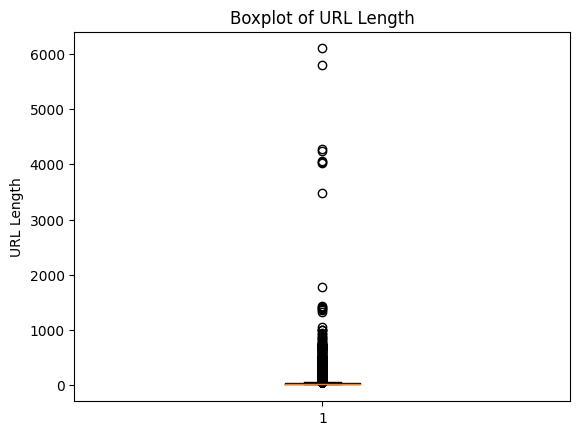

In [ ]:
plt.boxplot(df.URLLength)
plt.ylabel("URL Length")
plt.title("Boxplot of URL Length")
plt.show()

In [ ]:
greater_than_500 = df[df.URLLength > 500]
greater_than_500_and_phishing = greater_than_500[greater_than_500.label == 0]

print(f"Number of URLs with length greater than 500: {greater_than_500.shape[0]}")
print(f"Number of URLs with length greater than 500 and labeled as phishing: {greater_than_500_and_phishing.shape[0]}")


Number of URLs with length greater than 500: 123
Number of URLs with length greater than 500 and labeled as phishing: 123


In [ ]:
df.TLD.value_counts()

TLD
com      112554
org       18793
net        7097
app        6508
uk         6395
          ...  
47            1
sharp         1
faith         1
243           1
ne            1
Name: count, Length: 695, dtype: int64

In [ ]:
print(df.TLD.unique())

['com' 'de' 'uk' 'org' 'in' 'ie' 'hu' 'ru' 'gq' 'es' 'jp' 'guru' 'app'
 'io' 'club' 'fr' 'au' 'today' 'cloud' 'br' 'pt' 'co' 'lt' 'ca' 'xyz' 'sk'
 'pl' 'dk' 'dev' 'ga' 'edu' 'space' 'ws' '123' 'cf' 'rs' 'games' 'nl' 'me'
 'net' 'life' 'ua' 'id' 'mx' 'asia' 'store' 'nz' 'eus' 'qa' 'fi' 'ch'
 'site' 'shop' 'hr' 'cz' 'im' 'ee' 'sg' 'travel' 'tz' 'top' 'info' 'tokyo'
 'at' 'gr' 'cc' 'tv' 'online' 'lk' 'review' 'us' 'bar' 'link' 'ng' 'cl'
 'ar' 'one' 'ph' 'tr' 'mil' 'se' '94' 'live' 'cn' 'ir' 'it' 'gd' 'eu'
 'win' 'no' 'su' 'gov' 'bg' 'ro' 'kr' 'eg' 'biz' 'il' 'page' 'pm' 'sh'
 'pk' 'my' 'quest' 'be' 'sa' 'tk' 'vip' 'agency' 'cyou' 'kz' 'uy'
 'network' '128' 'ml' 'hk' 'media' 'az' 'aero' 'news' 'lu' 'is' 'coop'
 'art' 'download' 'si' 'fm' 'bt' 'am' 'finance' 'mn' 'kh' 'ug' 'ae' 'cool'
 'za' 'th' 'energy' 'lv' 'global' 'tw' 'ke' 'moe' 'icu' '103' 'fun' '130'
 'cm' 'int' 'xn--c1avg' 'vg' 'gi' 'red' 'gal' 'sy' 'na' 'bo' 'land' 'je'
 'st' 'by' 'ly' 'bid' 'bio' 'world' 'law' 'digital' 'ai' 'scie

In [ ]:
df.label.value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [ ]:
134850- 100945

33905

In [ ]:
df.head()

,URL,URLLength,Domain,DomainLength,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,com,3,1,18,0.581,0,0.0,0,0,0,1,0.032,1,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,de,2,1,9,0.391,0,0.0,0,0,0,2,0.087,1,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,uk,2,2,15,0.517,0,0.0,0,0,0,2,0.069,1,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,com,3,1,13,0.500,0,0.0,0,0,0,1,0.038,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,org,3,1,20,0.606,0,0.0,0,0,0,1,0.030,1,85,1


**Splitting the URL by the occurance of Puctuations ( Tokenaization )**

In [ ]:
def split_by_punc(url):
    url_parts = re.split(r'([{}])'.format(re.escape(string.punctuation)), url)
    url_joined = ' '.join(url_parts)
    return url_joined

df['clean_url'] = df['URL'].apply(split_by_punc)
df.head()

,URL,URLLength,Domain,DomainLength,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,NoOfExternalRef,label,clean_url
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,com,3,1,18,0.581,0,0.0,0,0,0,1,0.032,1,124,1,https : / / www . southbankmosaics . com
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,de,2,1,9,0.391,0,0.0,0,0,0,2,0.087,1,217,1,https : / / www . uni - mainz . de
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,uk,2,2,15,0.517,0,0.0,0,0,0,2,0.069,1,5,1,https : / / www . voicefmradio . co . uk
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,com,3,1,13,0.500,0,0.0,0,0,0,1,0.038,1,31,1,https : / / www . sfnmjournal . com
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,org,3,1,20,0.606,0,0.0,0,0,0,1,0.030,1,85,1,https : / / www . rewildingargentina . org


**Removing Punctuations From URL**

In [ ]:
def remove_punctuations(url):
    clean_url = ''.join(char for char in url if char not in string.punctuation)
    return clean_url


df['clean_url'] = df['clean_url'].apply(remove_punctuations).str.lower()

df.head()

,URL,URLLength,Domain,DomainLength,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,NoOfExternalRef,label,clean_url
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,com,3,1,18,0.581,0,0.0,0,0,0,1,0.032,1,124,1,https www southbankmosaics com
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,de,2,1,9,0.391,0,0.0,0,0,0,2,0.087,1,217,1,https www uni mainz de
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,uk,2,2,15,0.517,0,0.0,0,0,0,2,0.069,1,5,1,https www voicefmradio co uk
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,com,3,1,13,0.500,0,0.0,0,0,0,1,0.038,1,31,1,https www sfnmjournal com
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,org,3,1,20,0.606,0,0.0,0,0,0,1,0.030,1,85,1,https www rewildingargentina org


**Removing All 'WWW'**

In [ ]:
df['clean_url'] = df['clean_url'].apply(lambda x: x.replace('www', ''))
df.head()

,URL,URLLength,Domain,DomainLength,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,NoOfExternalRef,label,clean_url
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,com,3,1,18,0.581,0,0.0,0,0,0,1,0.032,1,124,1,https southbankmosaics com
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,de,2,1,9,0.391,0,0.0,0,0,0,2,0.087,1,217,1,https uni mainz de
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,uk,2,2,15,0.517,0,0.0,0,0,0,2,0.069,1,5,1,https voicefmradio co uk
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,com,3,1,13,0.500,0,0.0,0,0,0,1,0.038,1,31,1,https sfnmjournal com
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,org,3,1,20,0.606,0,0.0,0,0,0,1,0.030,1,85,1,https rewildingargentina org


In [ ]:
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'TLD', 'TLDLength',
       'NoOfSubDomain', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'NoOfExternalRef', 'label',
       'clean_url'],
      dtype='object')

## **NUMERICAL FEATURES**

In [ ]:
x_num=df.drop(columns=['URL','Domain','TLD','label','clean_url'])
x_num

,URLLength,DomainLength,TLDLength,NoOfSubDomain,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,NoOfExternalRef
0,31,24,3,1,18,0.581,0,0.000,0,0,0,1,0.032,1,124
1,23,16,2,1,9,0.391,0,0.000,0,0,0,2,0.087,1,217
2,29,22,2,2,15,0.517,0,0.000,0,0,0,2,0.069,1,5
3,26,19,3,1,13,0.500,0,0.000,0,0,0,1,0.038,1,31
4,33,26,3,1,20,0.606,0,0.000,0,0,0,1,0.030,1,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,3,1,16,0.552,0,0.000,0,0,0,1,0.034,1,191
235791,28,21,2,2,14,0.500,0,0.000,0,0,0,2,0.071,1,31
235792,30,23,2,1,17,0.567,0,0.000,0,0,0,1,0.033,1,67
235793,55,47,3,2,39,0.709,3,0.055,0,0,0,5,0.091,1,0


In [ ]:
y_num=df['label']
y_num

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

**Splitting into Training and Testing Set**

In [ ]:
x_num_train, x_num_test, y_num_train, y_num_test = train_test_split(x_num, y_num, test_size=0.2, random_state=42)

print("Shape of X_train:", x_num_train.shape)
print("Shape of X_test:", x_num_test.shape)
print("Shape of y_train:", y_num_train.shape)
print("Shape of y_test:", y_num_test.shape)


Shape of X_train: (188636, 15)
Shape of X_test: (47159, 15)
Shape of y_train: (188636,)
Shape of y_test: (47159,)


**Oversampling training set using SMOTE**

In [ ]:
sm = SMOTE(random_state=42)
x_num_train_oversampled, y_num_train_oversampled = sm.fit_resample(x_num_train, y_num_train)


In [ ]:
y_num_train_oversampled.value_counts()

label
0    107815
1    107815
Name: count, dtype: int64

**Scaling Using MinMaxScaler**

In [ ]:
scaler = MinMaxScaler()

x_num_train_oversampled_scaled = scaler.fit_transform(x_num_train_oversampled)
x_num_test_scaled = scaler.transform(x_num_test)


**Training and Testing XGBoost**

In [ ]:
XGBmodel_num = XGBClassifier()
XGBmodel_num.fit(x_num_train_oversampled_scaled, y_num_train_oversampled)

# prediction
y_pred_num = XGBmodel_num.predict(x_num_test_scaled)

# classification report
print(classification_report(y_num_test, y_pred_num))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



**Training and Testing Using Logistic Regression**

In [ ]:
LR_model_num = LogisticRegression()
LR_model_num.fit(x_num_train_oversampled_scaled, y_num_train_oversampled)

# prediction
y_pred_num = LR_model_num.predict(x_num_test_scaled)

# classification report
print(classification_report(y_num_test, y_pred_num))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20124
           1       0.99      1.00      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



**Training and Testing using Random Forest**

In [ ]:
RF_model_num = RandomForestClassifier()
RF_model_num.fit(x_num_train_oversampled_scaled, y_num_train_oversampled)

# prediction
y_pred_num = RF_model_num.predict(x_num_test_scaled)

# classification report
print(classification_report(y_num_test, y_pred_num))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20124
           1       0.99      0.99      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



**Training and Testing using Naive Bayes**

In [ ]:
nb_model_num = GaussianNB()
nb_model_num.fit(x_num_train_oversampled_scaled, y_num_train_oversampled)

# predictions
y_pred_num = nb_model_num.predict(x_num_test_scaled)

# classification report
print(classification_report(y_num_test, y_pred_num))


              precision    recall  f1-score   support

           0       1.00      0.85      0.92     20124
           1       0.90      1.00      0.95     27035

    accuracy                           0.93     47159
   macro avg       0.95      0.92      0.93     47159
weighted avg       0.94      0.93      0.93     47159



**Checking each model performance using Random URLs**

In [ ]:
def predict_url(url):
  # Extracting URL features
  url_features = extract_url_features(url)

  # Converting features to a DataFrame
  url_df = pd.DataFrame([url_features])
  url_df['NoOfExternalRef']=5

  # Scaling the features
  url_scaled = scaler.transform(url_df)

  # Prediction using XGBoost
  xgb_prediction = XGBmodel_num.predict(url_scaled)[0]
  xgb_probability = XGBmodel_num.predict_proba(url_scaled)[0][xgb_prediction]

  # Prediction using LogisticRegression
  lr_prediction = LR_model_num.predict(url_scaled)[0]
  lr_probability = LR_model_num.predict_proba(url_scaled)[0][lr_prediction]

  # Prediction using RandomForestClassifier
  rf_prediction = RF_model_num.predict(url_scaled)[0]
  rf_probability = RF_model_num.predict_proba(url_scaled)[0][rf_prediction]

  # Prediction using GaussianNB
  nb_prediction = nb_model_num.predict(url_scaled)[0]
  nb_probability = nb_model_num.predict_proba(url_scaled)[0][nb_prediction]

  # predictions and probabilities for each model
  print("XGBoost Prediction:", xgb_prediction, "Probability:", xgb_probability)
  print("LogisticRegression Prediction:", lr_prediction, "Probability:", lr_probability)
  print("RandomForestClassifier Prediction:", rf_prediction, "Probability:", rf_probability)
  print("GaussianNB Prediction:", nb_prediction, "Probability:", nb_probability)


url = "https://www.britannica.com/money/PayPal"
prediction = predict_url(url)



XGBoost Prediction: 1 Probability: 0.7942536
LogisticRegression Prediction: 0 Probability: 0.9810440862670256
RandomForestClassifier Prediction: 1 Probability: 0.5883411840714902
GaussianNB Prediction: 1 Probability: 0.9999999999996305


### ***Random Forest is the Best Performing Model***

# **Text Features**

In [ ]:
df.columns

Index(['URL', 'URLLength', 'Domain', 'DomainLength', 'TLD', 'TLDLength',
       'NoOfSubDomain', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'NoOfExternalRef', 'label',
       'clean_url'],
      dtype='object')

In [ ]:
x_text=df.clean_url
x_text

0                        https        southbankmosaics  com
1                               https        uni  mainz  de
2                         https        voicefmradio  co  uk
3                             https        sfnmjournal  com
4                      https        rewildingargentina  org
                                ...                        
235790                     https        skincareliving  com
235791                     https        winchester  gov  uk
235792                    https        nononsensedesign  be
235793    https      patient  cell  40f5  updatedlogmylo...
235794                 https        alternativefinland  com
Name: clean_url, Length: 235795, dtype: object

In [ ]:
y_text=df.label
y_text

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: label, Length: 235795, dtype: int64

**Splitting into Training and Testing Set**

In [ ]:
x_train_text, x_test_text, y_train_text, y_test_text = train_test_split(x_text, y_text, test_size=0.25, random_state=42)

print("Shape of x_train_text:", x_train_text.shape)
print("Shape of x_test_text:", x_test_text.shape)
print("Shape of y_train_text:", y_train_text.shape)
print("Shape of y_test_text:", y_test_text.shape)


Shape of x_train_text: (176846,)
Shape of x_test_text: (58949,)
Shape of y_train_text: (176846,)
Shape of y_test_text: (58949,)


**Feature Extraction using TF- IDF Method**

In [ ]:
vectorizer = TfidfVectorizer()

x_train_text_vectorized = vectorizer.fit_transform(x_train_text)
x_test_text_vectorized = vectorizer.transform(x_test_text)

print("Shape of x_train_text_vectorized:", x_train_text_vectorized.shape)
print("Shape of x_test_text_vectorized:", x_test_text_vectorized.shape)


Shape of x_train_text_vectorized: (176846, 185370)
Shape of x_test_text_vectorized: (58949, 185370)


**Oversampling Using SMOTE**

In [ ]:
sm = SMOTE(random_state=42)
x_train_text_vectorized_oversampled, y_train_text_oversampled = sm.fit_resample(x_train_text_vectorized, y_train_text)

y_train_text_oversampled.value_counts()



label
0    101043
1    101043
Name: count, dtype: int64

**XGBoost**

In [ ]:
XGBmodel_text = XGBClassifier()
XGBmodel_text.fit(x_train_text_vectorized_oversampled, y_train_text_oversampled)

# prediction
y_pred_text = XGBmodel_text.predict(x_test_text_vectorized)

# classification report
print(classification_report(y_test_text, y_pred_text))


              precision    recall  f1-score   support

           0       0.99      0.86      0.92     25142
           1       0.90      0.99      0.95     33807

    accuracy                           0.94     58949
   macro avg       0.95      0.93      0.93     58949
weighted avg       0.94      0.94      0.94     58949



**Logistic Regression**

In [ ]:
LR_model_text = LogisticRegression()
LR_model_text.fit(x_train_text_vectorized_oversampled, y_train_text_oversampled)

# prediction
y_pred_text = LR_model_text.predict(x_test_text_vectorized)

# classification report
print(classification_report(y_test_text, y_pred_text))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     25142
           1       0.95      1.00      0.98     33807

    accuracy                           0.97     58949
   macro avg       0.98      0.97      0.97     58949
weighted avg       0.97      0.97      0.97     58949



**Random Forest**

In [ ]:
RF_model_text = RandomForestClassifier()
RF_model_text.fit(x_train_text_vectorized_oversampled, y_train_text_oversampled)

# prediction
y_pred_text = RF_model_text.predict(x_test_text_vectorized)

#classification report
print(classification_report(y_test_text, y_pred_text))


              precision    recall  f1-score   support

           0       0.99      0.76      0.86     25142
           1       0.85      0.99      0.92     33807

    accuracy                           0.90     58949
   macro avg       0.92      0.88      0.89     58949
weighted avg       0.91      0.90      0.89     58949



**MultiNomial NB**

In [ ]:
MNB_model_text = MultinomialNB()
MNB_model_text.fit(x_train_text_vectorized_oversampled, y_train_text_oversampled)

# prediction
y_pred_text = MNB_model_text.predict(x_test_text_vectorized)

#classification report
print(classification_report(y_test_text, y_pred_text))



              precision    recall  f1-score   support

           0       0.93      0.98      0.96     25142
           1       0.99      0.95      0.97     33807

    accuracy                           0.96     58949
   macro avg       0.96      0.96      0.96     58949
weighted avg       0.96      0.96      0.96     58949



**Checking each model performance using Random URLs**

In [ ]:
def predict_url_text(url):

  # Extracting numerical URL features
  url_features = extract_url_features(url)

  # Converting the numerical features to a DataFrame
  url_df = pd.DataFrame([url_features])
  url_df['NoOfExternalRef']=5

  # Scaling the numerical features
  url_scaled = scaler.transform(url_df)

  # preprocessing the URL (Text data)
  url_cleaned = split_by_punc(url)
  url_cleaned = remove_punctuations(url_cleaned)
  url_cleaned = url_cleaned.replace('www', '')

  # Vectorizing the cleaned URL (Text data)
  url_vectorized = vectorizer.transform([url_cleaned])

  # Prediction using XGBoost
  xgb_prediction = XGBmodel_text.predict(url_vectorized)[0]
  xgb_probability = XGBmodel_text.predict_proba(url_vectorized)[0][xgb_prediction]

  # Prediction using LogisticRegression
  lr_prediction = LR_model_text.predict(url_vectorized)[0]
  lr_probability = LR_model_text.predict_proba(url_vectorized)[0][lr_prediction]

  # Prediction using RandomForestClassifier
  rf_prediction = RF_model_text.predict(url_vectorized)[0]
  rf_probability = RF_model_text.predict_proba(url_vectorized)[0][rf_prediction]

  # Prediction using MultinomialNB
  mnb_prediction = MNB_model_text.predict(url_vectorized)[0]
  mnb_probability = MNB_model_text.predict_proba(url_vectorized)[0][mnb_prediction]

  #predictions and probabilities for each model
  print("XGBoost Prediction:", xgb_prediction, "Probability:", xgb_probability)
  print("LogisticRegression Prediction:", lr_prediction, "Probability:", lr_probability)
  print("RandomForestClassifier Prediction:", rf_prediction, "Probability:", rf_probability)
  print("MultinomialNB Prediction:", mnb_prediction, "Probability:", mnb_probability)


url = "http://www.lijiejie.nat123.cc"
prediction = predict_url_text(url)


XGBoost Prediction: 0 Probability: 0.9964148
LogisticRegression Prediction: 0 Probability: 0.9989574211004734
RandomForestClassifier Prediction: 0 Probability: 0.5142164863268256
MultinomialNB Prediction: 0 Probability: 0.9223883083883025


### ***Logistice Regression is the Best Model here***

**Dumping models into a Pickle FIle**

In [ ]:
import pickle

objects_to_dump = {
    'RF_model_num': RF_model_num,
    'LR_model_text': LR_model_text,
    'vectorizer': vectorizer,
    'scaler': scaler,
}


pickle_file_path = '/content/drive/MyDrive/Colab Notebooks/PHYSHING SITE PROJECT/FINALL_PHISHING1.pkl'


with open(pickle_file_path, 'wb') as f:
    pickle.dump(objects_to_dump, f)

**Function to collect number of External References**

In [ ]:
import requests
from bs4 import BeautifulSoup

def count_external_references(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Find all <a> tags with 'href' attribute pointing to another webpage
        external_refs = soup.find_all('a', href=True)
        # Count the number of external references
        num_external_refs = len(external_refs)
        return num_external_refs
    except Exception as e:
        print(f"Error fetching URL: {e}")
        return None

# Example usage:
url = "https://www.geeksforgeeks.org/query-editor-in-power-bi-for-data-transformation/"
num_external_refs = count_external_references(url)
print("Number of external references:", num_external_refs)


Number of external references: 700
